In [1]:
import os
import zipfile

local_zip = (
    "C:/Users/jadav/Desktop/Tensorflow notebooks/datasets/cats_and_dogs_filtered.zip"
)

zip_ref = zipfile.ZipFile(local_zip, "r")

zip_ref.extractall("C:/Users/jadav/Desktop/Tensorflow notebooks/datasets")
zip_ref.close()

In [2]:
base_dir = "C:/Users/jadav/Desktop/Tensorflow notebooks/datasets/cats_and_dogs_filtered"

train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

# Directory with our training cat/dog pictures
train_cats_dir = os.path.join(train_dir, "cats")
train_dogs_dir = os.path.join(train_dir, "dogs")

# Directory with our validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, "cats")
validation_dogs_dir = os.path.join(validation_dir, "dogs")

In [3]:
train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [4]:
print("total training cat images :", len(os.listdir(train_cats_dir)))
print("total training dog images :", len(os.listdir(train_dogs_dir)))

print("total validation cat images :", len(os.listdir(validation_cats_dir)))
print("total validation dog images :", len(os.listdir(validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 522


In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0  # Index for iterating over images

(374, 500, 3)
(280, 300, 3)
(499, 489, 3)
(499, 403, 3)
(200, 296, 3)
(343, 349, 3)
(386, 500, 3)
(399, 253, 3)
(375, 499, 3)
(499, 327, 3)
(292, 269, 3)
(397, 500, 3)
(500, 440, 3)
(373, 499, 3)
(433, 499, 3)
(375, 499, 3)


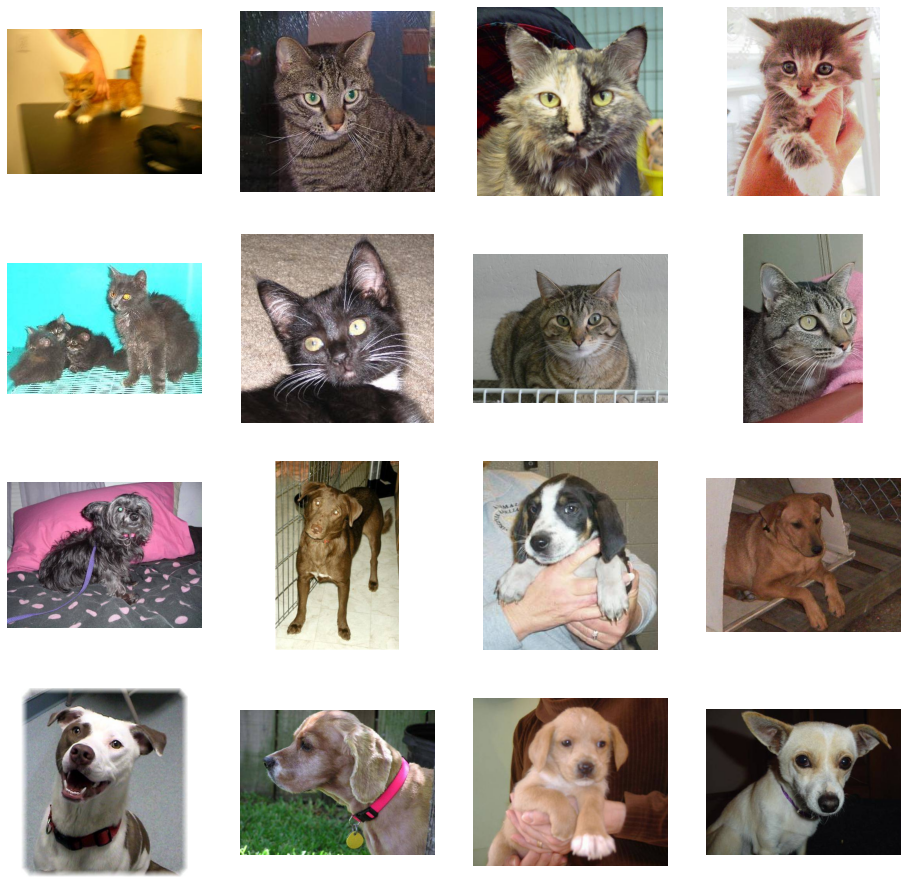

In [6]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8

next_cat_pix = [
    os.path.join(train_cats_dir, fname)
    for fname in train_cat_fnames[pic_index - 8 : pic_index]
]

next_dog_pix = [
    os.path.join(train_dogs_dir, fname)
    for fname in train_dog_fnames[pic_index - 8 : pic_index]
]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis("Off")  # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    print(img.shape)
    plt.imshow(img)

plt.show()

In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            16, (3, 3), activation="relu", input_shape=(150, 150, 3)
        ),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(1, activation="sigmoid"),
    ]
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(lr=0.001), loss="binary_crossentropy", metrics=["accuracy"]
)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1.0 / 255.0)
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir, batch_size=20, class_mode="binary", target_size=(150, 150)
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, batch_size=20, class_mode="binary", target_size=(150, 150)
)

Found 2000 images belonging to 2 classes.
Found 1022 images belonging to 2 classes.


In [11]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_steps=50,
    verbose=1,
)

Epoch 1/15
100/100 [==============================] - 16s 91ms/step - loss: 0.9302 - accuracy: 0.5246 - val_loss: 0.6731 - val_accuracy: 0.6130
Epoch 2/15
100/100 [==============================] - 7s 72ms/step - loss: 0.6526 - accuracy: 0.6315 - val_loss: 0.5817 - val_accuracy: 0.6970
Epoch 3/15
100/100 [==============================] - 6s 64ms/step - loss: 0.5457 - accuracy: 0.7282 - val_loss: 0.5497 - val_accuracy: 0.7230
Epoch 4/15
100/100 [==============================] - 6s 62ms/step - loss: 0.4584 - accuracy: 0.7877 - val_loss: 0.5588 - val_accuracy: 0.7420
Epoch 5/15
100/100 [==============================] - 7s 67ms/step - loss: 0.3556 - accuracy: 0.8379 - val_loss: 0.6011 - val_accuracy: 0.7250
Epoch 6/15
100/100 [==============================] - 6s 60ms/step - loss: 0.2724 - accuracy: 0.8846 - val_loss: 1.1381 - val_accuracy: 0.6130
Epoch 7/15
100/100 [==============================] - 6s 65ms/step - loss: 0.2350 - accuracy: 0.8991 - val_loss: 0.7531 - val_accuracy: 0.715

In [12]:
import numpy as np

# from google.colab import files
from keras.preprocessing import image

# uploaded=files.upload()

# for fn in uploaded.keys():

# predicting images
#   path='/content/' + fn
path = "C:/Users/jadav/Desktop/Tensorflow notebooks/cat-dog-val/"
for fn in os.listdir(path):
    img = image.load_img(path + fn, target_size=(150, 150))

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(classes[0])

    if classes[0] > 0:
        print(fn + " is a dog")

    else:
        print(fn + " is a cat")

[1.]
cat.2002.jpg is a dog
[1.]
cat.2025.jpg is a dog
[0.]
cat.2030.jpg is a cat
[0.]
cat.2040.jpg is a cat
[0.]
cat.2043.jpg is a cat
[0.]
cat.2058.jpg is a cat
[1.]
cat.2061.jpg is a dog
[1.]
cat.2063.jpg is a dog
[0.]
cat.2064.jpg is a cat
[0.]
cat.2067.jpg is a cat
[0.]
cat.2086.jpg is a cat
[1.]
cat.2236.jpg is a dog
[0.]
cat.2237.jpg is a cat
[0.]
cat.2242.jpg is a cat
[0.]
cat.2246.jpg is a cat
[0.]
cat.2259.jpg is a cat
[0.]
cat.2433.jpg is a cat
[0.]
cat.2434.jpg is a cat
[0.]
cat.2435.jpg is a cat
[1.]
cat.2436.jpg is a dog
[1.]
cat.2442.jpg is a dog
[1.]
dog.2000 - Copy.jpg is a dog
[1.]
dog.2002 - Copy.jpg is a dog
[1.]
dog.2003 - Copy.jpg is a dog
[1.]
dog.2004 - Copy.jpg is a dog
[0.]
dog.2006 - Copy.jpg is a cat
[1.]
dog.2019 - Copy.jpg is a dog
[1.]
dog.2022 - Copy.jpg is a dog
[1.]
dog.2024 - Copy.jpg is a dog
[0.]
dog.2025 - Copy.jpg is a cat
[1.]
dog.2029 - Copy.jpg is a dog
[1.]
dog.2031 - Copy.jpg is a dog
[1.]
dog.2032 - Copy.jpg is a dog
[1.]
dog.2033 - Copy.jpg 

<ipython-input-13-405e9dd7aa3b>:55: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


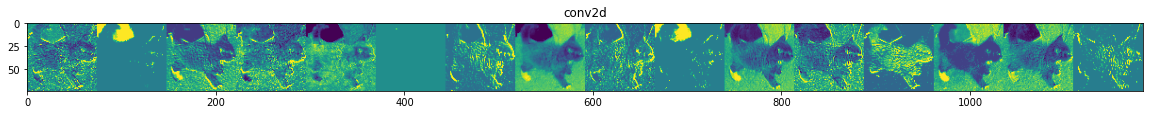

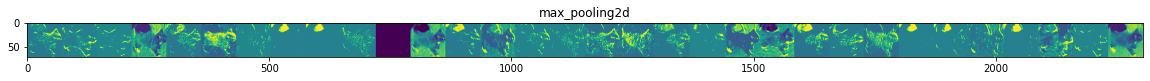

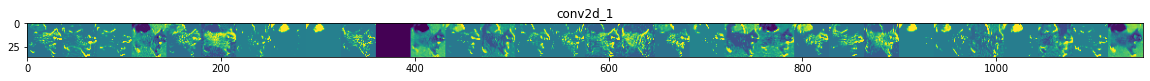

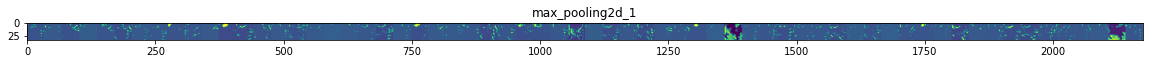

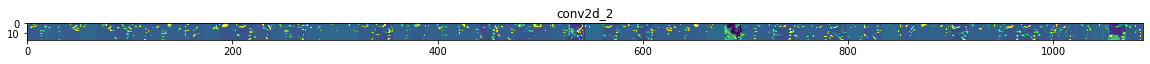

In [13]:
import random

import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]

# visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(
    inputs=model.input, outputs=successive_outputs
)

# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image

x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):

    if len(feature_map.shape) == 4:

        # -------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        # -------------------------------------------
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)

        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))

        # -------------------------------------------------
        # Postprocess the feature to be visually palatable
        # -------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype("uint8")
            display_grid[
                :, i * size : (i + 1) * size
            ] = x  # Tile each filter into a horizontal grid

        # -----------------
        # Display the grid
        # -----------------

        scale = 20.0 / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect="auto", cmap="viridis")

Text(0.5, 1.0, 'Training and validation loss')

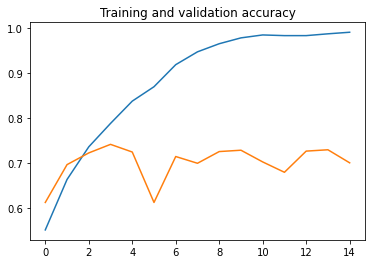

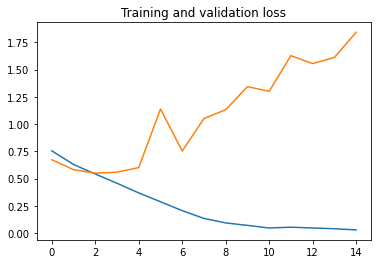

In [14]:
# -----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
# -----------------------------------------------------------
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))  # Get number of epochs

# ------------------------------------------------
# Plot training and validation accuracy per epoch
# ------------------------------------------------
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title("Training and validation accuracy")
plt.figure()

# ------------------------------------------------
# Plot training and validation loss per epoch
# ------------------------------------------------
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title("Training and validation loss")